In [104]:
import numpy as np
import pandas as pd

df = pd.read_csv("data.csv", header=None)
df

,0,1,2
0,10182.554999,-371.830691,100.0
1,-8493.323486,7009.446179,0.0
2,21322.088204,-390.558362,100.0
3,5473.925002,-1878.223941,0.0
4,-7422.540710,5291.351276,0.0
...,...,...,...
14995,-7273.210307,5827.740028,0.0
14996,16408.532323,1111.727000,100.0
14997,-7732.465058,14232.038118,0.0
14998,6249.812673,6541.827106,0.0


In [105]:
#import matplotlib.pyplot as plt 

#plt.scatter(df[0], df[1])

In [106]:
# remove outliers 
Q1 = df[0].quantile(q=0.25)
Q3 = df[0].quantile(q=0.75)
IQR = Q3-Q1
# remove outliers
ul = Q3 + 1.5 * IQR
ll = Q1 - 1.5*IQR
outliers = [(df[0] > ul) | (df[0] < ll)]
df.drop(df[(df[0] > ul) | (df[0] < ll) ].index , inplace=True)

In [107]:
df.shape

(14996, 3)

In [108]:
df.corr()

,0,1,2
0,1.000000,-0.318379,0.521763
1,-0.318379,1.000000,-0.612707
2,0.521763,-0.612707,1.000000


In [151]:
from sklearn.model_selection import train_test_split
X=df.drop(2,axis=1)
Y=df[2]
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [152]:
X_train.shape

(8997, 2)

In [153]:
X_test.shape

(3000, 2)

In [154]:
############decision tree

In [155]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

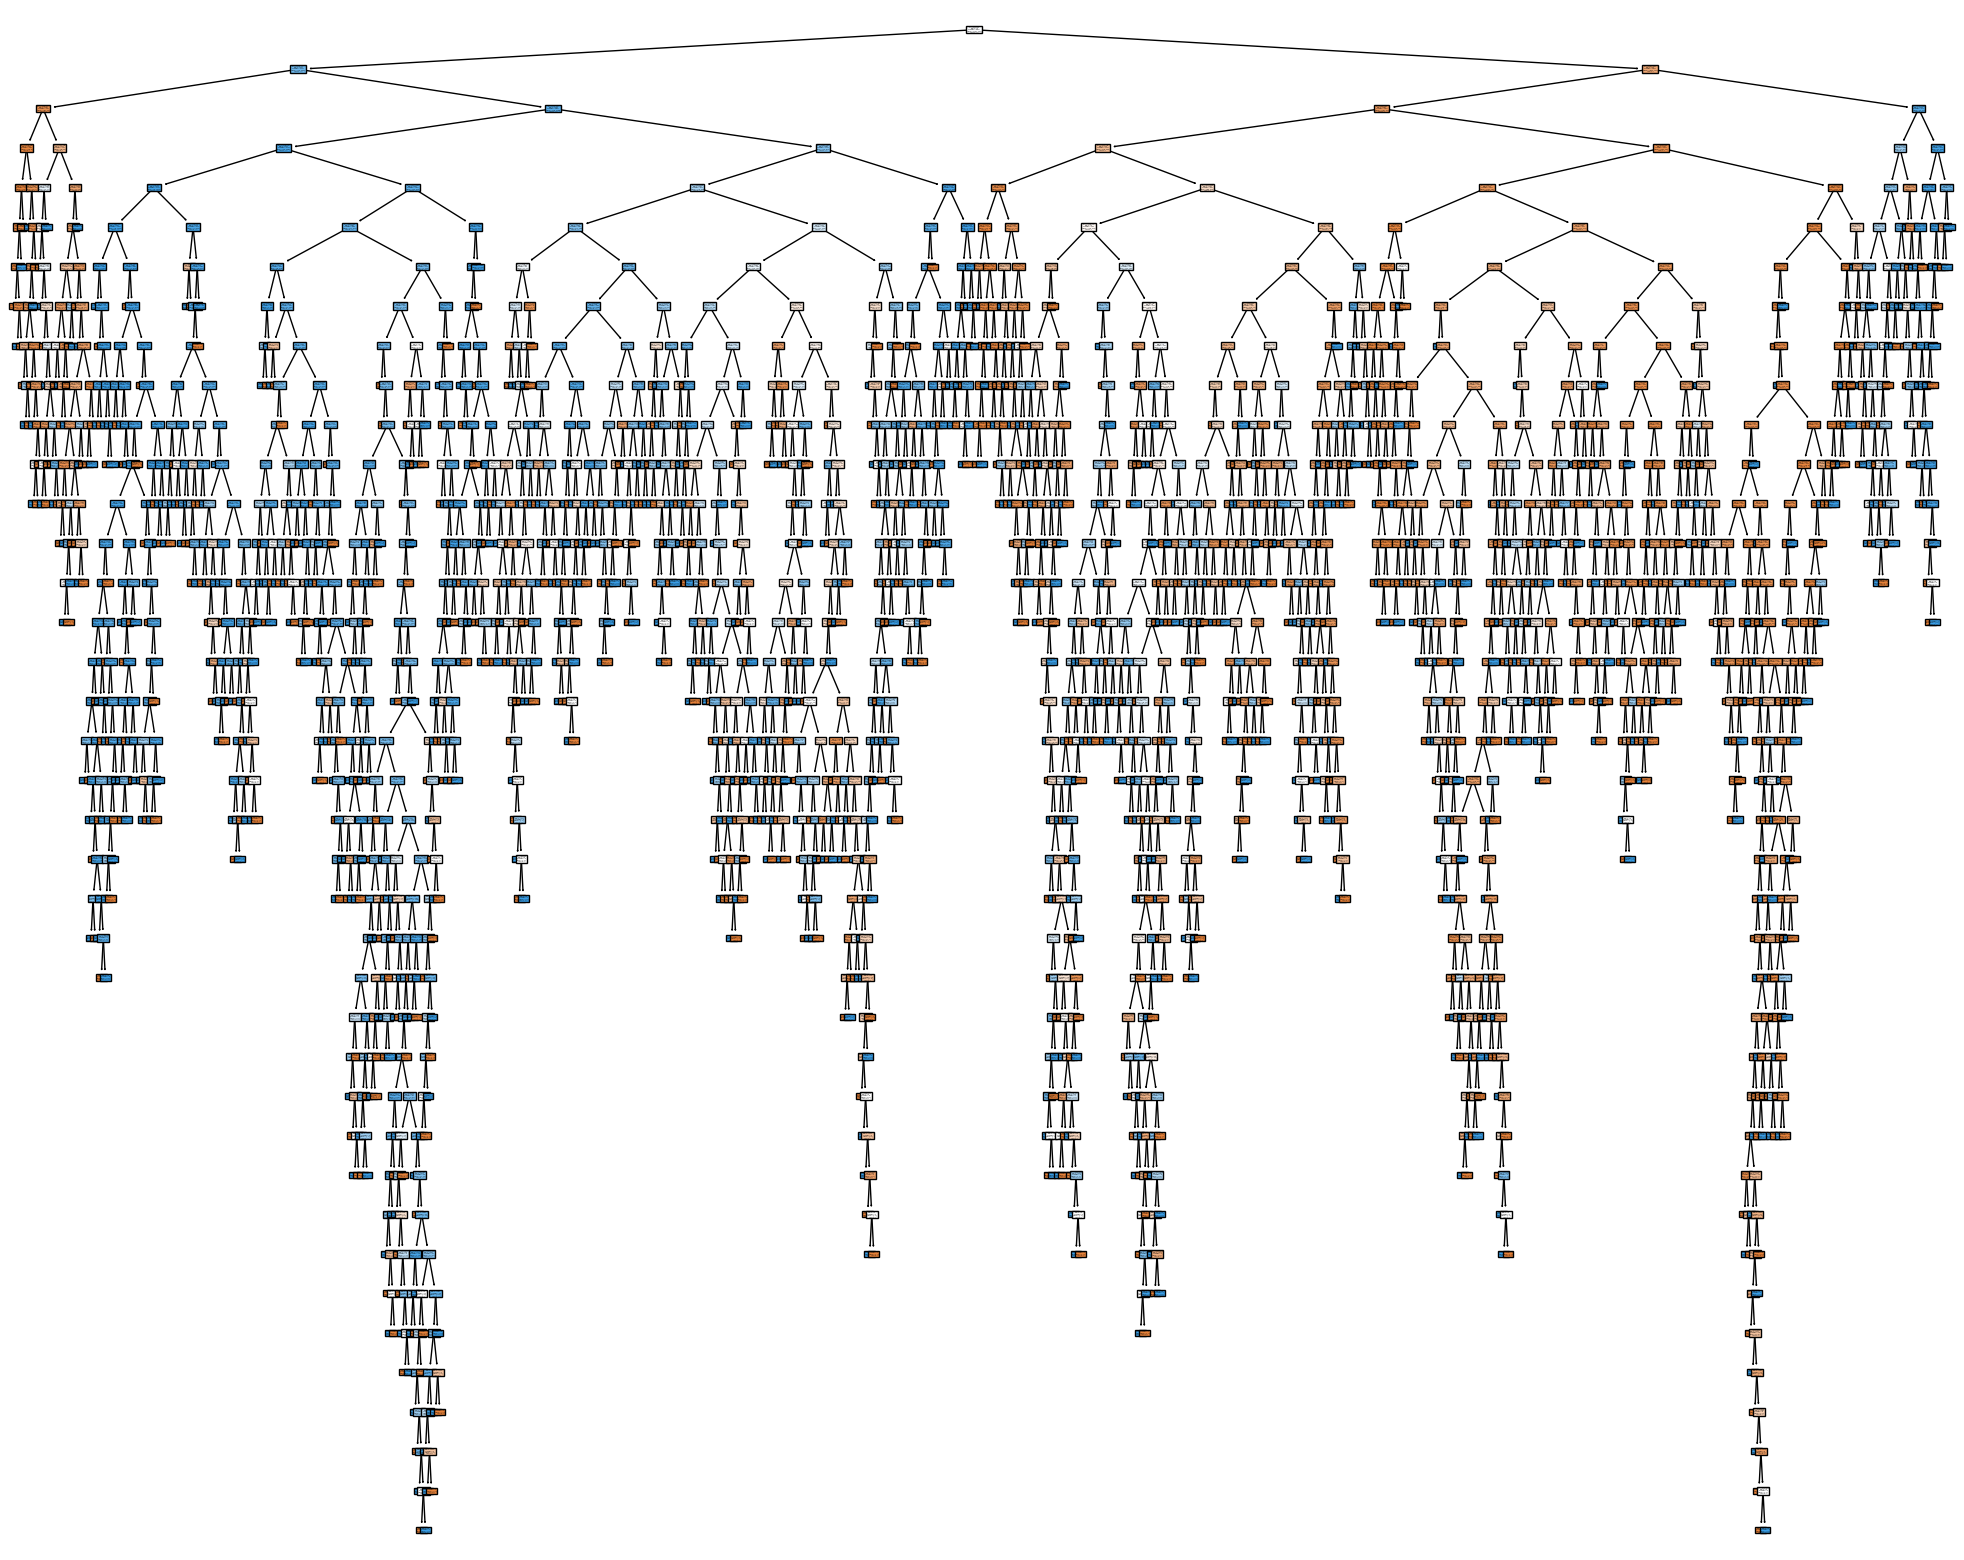

In [156]:
from sklearn import tree
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(25,20))
tree_plot = tree.plot_tree(dt_model,
                   feature_names=X_train.columns,
                   class_names=['0', "100"],
                   filled=True)

In [157]:
dt_model.score(X_train,y_train)

1.0

In [158]:
dt_model.score(X_test,y_test)

0.8106666666666666

In [159]:
prediction = dt_model.predict(X_test)
y_pred = prediction

In [161]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8106666666666666

In [162]:
# use hyperparameter tuning to find the best parameters for our model 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
#X=df.drop(2,axis=1)
#Y=df[2]
model_dt = DecisionTreeClassifier()

In [163]:
param_grid = {"max_depth":[2,4,6,8,10,12],"max_features":[1,2,3],'criterion':["gini",'entropy']}

In [164]:
g_search = GridSearchCV(estimator = model_dt, param_grid = param_grid, cv = 10, return_train_score=True)
g_search.fit(X_train, y_train);
print(g_search.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 2}


In [165]:
g_search.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=2)

In [166]:
classifier = DecisionTreeClassifier(max_depth = 4,max_features=2, criterion = "gini",random_state=1,splitter='best')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=2, random_state=1)

In [167]:
y_pred

array([100.,   0., 100., ...,   0.,   0., 100.])

In [168]:
y_pred = g_search.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.858

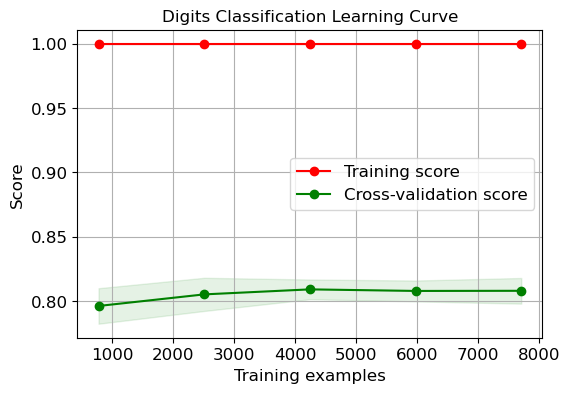

In [169]:
skplt.estimators.plot_learning_curve(DecisionTreeClassifier(), X_train, y_train,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Digits Classification Learning Curve");

In [171]:
#plt.plot(classifier.loss_curve_)
#plt.plot(classifier.validation_scores_)

In [71]:
#############################

In [72]:
X

,0,1
0,10182.554999,-371.830691
1,-8493.323486,7009.446179
2,21322.088204,-390.558362
3,5473.925002,-1878.223941
4,-7422.540710,5291.351276
...,...,...
14995,-7273.210307,5827.740028
14996,16408.532323,1111.727000
14997,-7732.465058,14232.038118
14998,6249.812673,6541.827106


In [73]:
#logistic regression

In [112]:
from sklearn import linear_model
classifier = linear_model.LogisticRegression()
X=df.drop(2,axis=1)
Y=df[2]
classifier.fit(X_train, y_train)

LogisticRegression()

In [113]:
y_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.834

In [101]:
pip install scikit-plot


Note: you may need to restart the kernel to use updated packages.


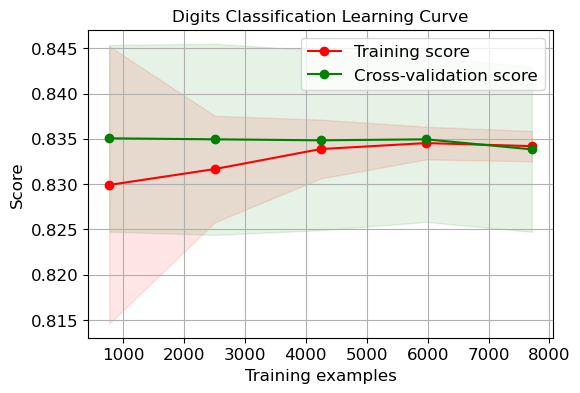

In [117]:
import scikitplot as skplt

skplt.estimators.plot_learning_curve(LogisticRegression(), X_train, y_train,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Digits Classification Learning Curve");

In [76]:
#################################################

In [77]:
#random forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(n_jobs=-1)
rnd.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [119]:
pred_rnd = rnd.predict(X_test)

In [120]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_rnd))

              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84      1531
       100.0       0.83      0.85      0.84      1469

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



In [121]:
metrics.accuracy_score(y_test, y_pred)

0.834

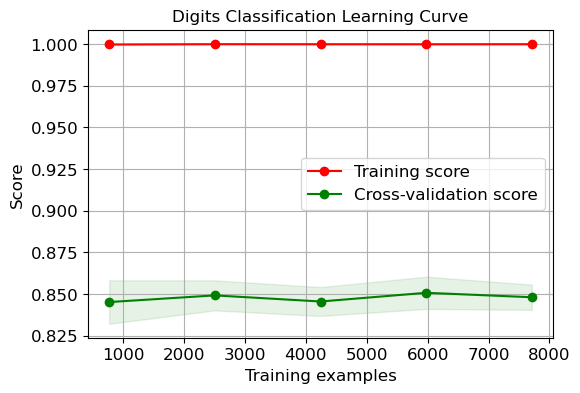

In [123]:
skplt.estimators.plot_learning_curve(RandomForestClassifier(), X_train, y_train,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Digits Classification Learning Curve");

In [82]:
#####################

In [83]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

In [84]:
pred_sgd = sgd.predict(X_test)

In [85]:
metrics.accuracy_score(y_test, pred_sgd)

0.667

In [86]:
######################
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [87]:
y_pred_rf

array([100.,   0., 100., ...,   0.,   0., 100.])

In [88]:
metrics.accuracy_score(y_test, y_pred_rf)

0.8456666666666667

In [89]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
ExtraTreesClassifier(random_state=0)
y_pred_rf= clf.predict(X_test)

In [90]:
metrics.accuracy_score(y_test, y_pred_rf)

0.843

In [173]:
# Feature Scaling (to make sure that data for different features are in the same range)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [174]:
# Instantiate the Support Vector Classifier (SVC)
from sklearn.svm import SVC
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [175]:
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.833


In [180]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='linear'), X, y, train_sizes=[14996, 569], cv=5)

ValueError: Found input variables with inconsistent numbers of samples: [14996, 569]

In [94]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))])

In [95]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.834
RandomForestClassifier 0.843
SVC 0.8636666666666667
VotingClassifier 0.8603333333333333


In [140]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 
# Read data
data = fetch_california_housing()
X, y = data.data, data.target
 
# train-test split for model evaluation
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
 
# Standardizing data
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
 
# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
 
# Define the model
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)
 
# loss function, metrics, and optimizer
loss_fn = nn.MSELoss()  # mean square error
mae_fn = nn.L1Loss()  # mean absolute error
optimizer = optim.Adam(model.parameters(), lr=0.001)
 
n_epochs = 100   # number of epochs to run
batch_size = 32  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)
 
train_mse_history = []
test_mse_history = []
test_mae_history = []
 
for epoch in range(n_epochs):
    model.train()
    epoch_mse = []
    for start in batch_start:
        # take a batch
        X_batch = X_train[start:start+batch_size]
        y_batch = y_train[start:start+batch_size]
        # forward pass
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        epoch_mse.append(float(loss))
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        # update weights
        optimizer.step()
    mean_mse = sum(epoch_mse) / len(epoch_mse)
    train_mse_history.append(mean_mse)
    # validate model on test set
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        mse = loss_fn(y_pred, y_test)
        mae = mae_fn(y_pred, y_test)
        test_mse_history.append(float(mse))
        test_mae_history.append(float(mae))

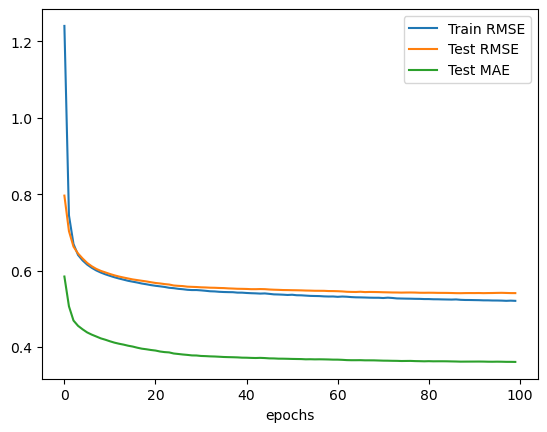

In [141]:

plt.plot(np.sqrt(train_mse_history), label="Train RMSE")
plt.plot(np.sqrt(test_mse_history), label="Test RMSE")
plt.plot(test_mae_history, label="Test MAE")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [51]:
#svmm bc dataset

In [142]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

In [143]:
# Load the data set
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
 
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [144]:
# Feature Scaling (to make sure that data for different features are in the same range)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [145]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [146]:
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.953
